## Import Libraries

In [58]:
import pandas.io.data as web
import pandas as pd
import quandl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Grab The DJIA Values

In [9]:
dow_code = 'BCB/UDJIAD1'
DJI = quandl.get(dow_code)

## List The Companies That Contribute to the Dow Jones Index

The companies include:
- Apple AAPL
- American Express AXP
- Boeing BA 
- Caterpillar CAT
- Cisco Systems CSCO
- Chevron CVX
- Coca-Cola KO
- DuPont DD
- ExxonMobil XOM
- General Electric GE
- Goldman Sachs GS
- Home Depot HD
- IBM IBM
- Intel INTC
- Johnson & Johnson JNJ
- JPMorgan Chase JPM
- McDonald's MCD
- 3M Company MMM
- Merck MRK
- Microsoft MSFT
- Nike NKE 
- Pfizer PFE
- Procter & Gamble PG
- The Travelers TRV
- UnitedHealth UNH
- United Technologies UTX
- Visa V
- Verizon VZ
- Wal-Mart WMT
- Walt Disney DIS

## Pulling Data for Each of These Companies

In [10]:
DJC_data = {}

DJComp = ['MSFT', 'PFE', 'MCD', 'UTX', 'DD', 'MMM', 'MRK', 'KO', 'WMT', 'HD', 'AAPL', 'CSCO', 'IBM', 'VZ', 'JNJ', 'GE', 'XOM', 'CVX', 'DIS', 'UNH', 'JPM', 'NKE', 'BA', 'CAT', 'TRV', 'GS', 'PG', 'V', 'AXP', 'INTC']

for ticket in DJComp:
    DJC_data[ticket] =web.get_data_yahoo(ticket)

DJIA_data = web.DataReader('DJIA','fred')

In [90]:
len(DJComp)

30

In [12]:
price = pd.DataFrame({tic:data['Adj Close'] for tic, data in DJC_data.iteritems()})

## Calculating Our Dow Jones Index Value based on Formula

(1714,)

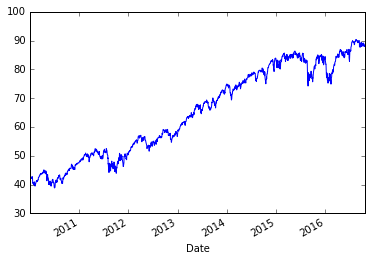

In [93]:
calculated = price.T.sum()/30
calculated.plot()
calculated.shape
# sm = []
# computed = pd.DataFrame(price.sum())

(1714, 1)

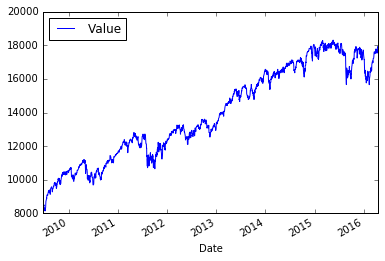

In [91]:
real = DJI.tail(1714) #Based on the calculated shape
real.plot()
real.shape

In [99]:
temp = zip(real.Value, calculated)
comparison = pd.DataFrame(temp)

## Taking a Closer Look at the Difference Visually

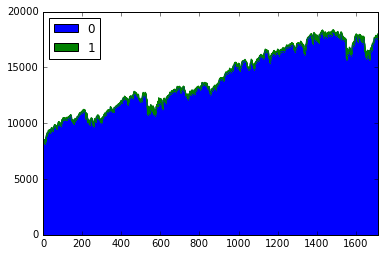

In [101]:
comparison.plot.area()

## Correlation between Calculated DJIA value and Real DJIA Value

In [88]:
real.Value.corr(calculated)

0.99737367886522954